# 106.从中序与后序遍历序列构造二叉树
输入：给出一棵二叉树的中序和后序遍历序列  
输出：符合该序列构造出的二叉树

## 思路
中序遍历：左中右  
后序遍历：左右中  

**如何根据两个给定的遍历顺序构造一个唯一的二叉树？ ** 

根据后序遍历的特点，最后一个元素肯定是二叉树的根节点  
- 所以先根据后序遍历拿到二叉树的根节点  
- 以根节点为界，划分中序遍历  
  - 根节点之前为“左”   
  - 根节点之后为“右”  
- 根据根节点的划分，在分出来的：“左右”中继续划分
  - 后序遍历的末尾为根节点左或右子树的根节点  

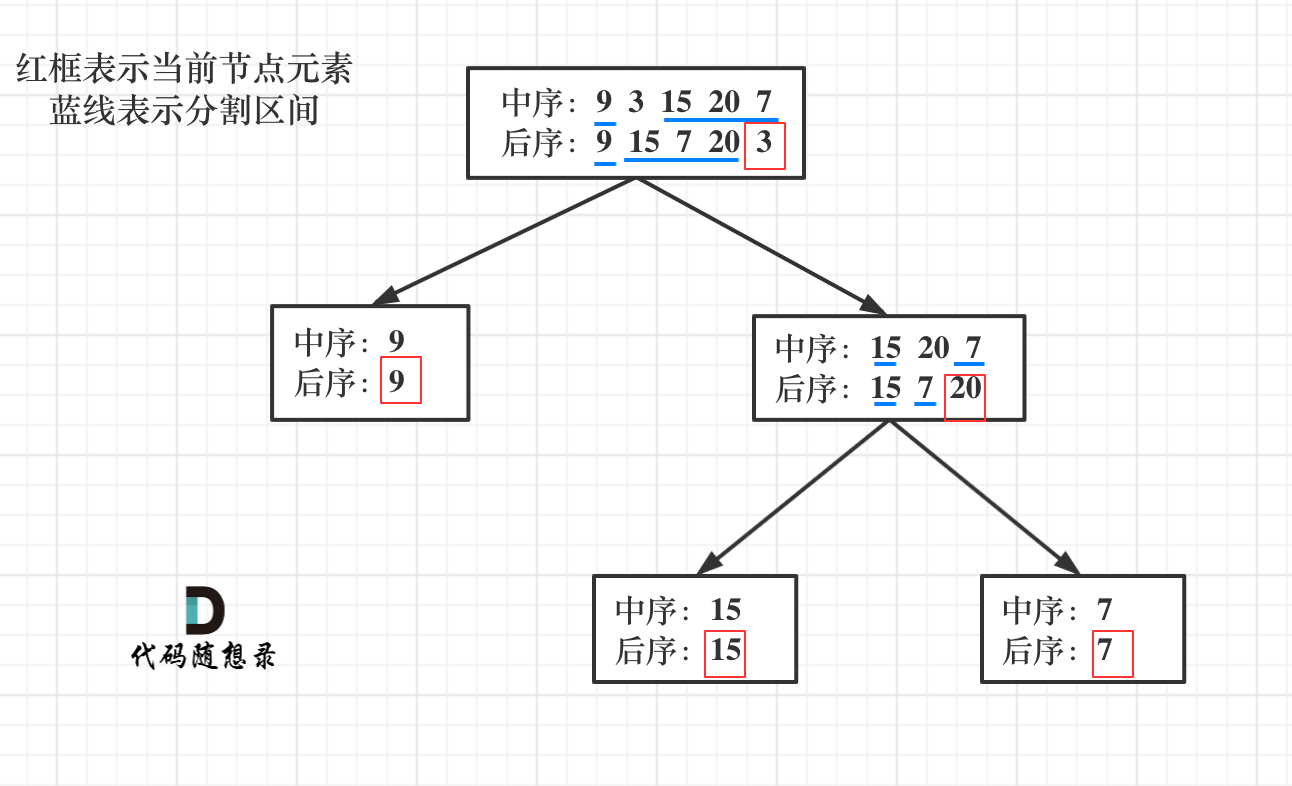

从上述步骤可以看出，每次都是先拿到后序遍历的最后一个元素作为划分依据  
划分出子树之后继续下一层划分  

**“层层切割”**  

### 递归方法
步骤：  
1. 判断边界情况：每次递归输入数组大小为0，肯定是空节点了  
2. 输入数组不为空：取后序数组最后一个元素作为根节点元素  
3. 找到该跟节点元素在中序数组中的位置，作为切割点  
4. 切割中序数组，得到中序左数组和中序右数组  
5. 切割后序数组，得到后序左数组和后序右数组  
6. 递归处理左区间和右区间  

 注意！涉及到划分问题，一定要保持住 **区间不变量**  
- 左闭右开  

根据 后序数组的最后一个元素 切割中序数组  
切割完后，后序数组的最后一个元素已经用了就不能要了。  
那么后序数组中，根据切割好的左中序数组，从第一个元素开始划分，划出和左中序数组相同大小的数组即为 左后序数组  
然后剩下的即为 右中序数组  

In [ ]:
# 递归
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def buildTree(self, inorder:list[int], postorder:list[int]) -> TreeNode:
        # 第一步：边界情况，递归终止条件
        if not postorder:
            return None
        
        # 第二步：后序数组找到切割点,作为当前的中间节点
        root_val = postorder[-1]
        root = TreeNode(root_val)

        # 第三步：找切割点
        seperator_idx = inorder.index(root_val)

        # 第四步：切割中序数组, 左闭右开
        inorder_left = inorder[:seperator_idx]
        inorder_right = inorder[seperator_idx + 1:]

        # 第五步：切割后序数组，按照已经切割好的左中序数组的尺寸
        postorder_left = postorder[:len(inorder_left)]
        postorder_right = postorder[len(inorder_left) : len(postorder) - 1]   # 后序数组的最后一个元素不包括

        # 第六步：递归处理左右区间
        root.left = self.buildTree(inorder_left, postorder_left)
        root.right = self.buildTree(inorder_right, postorder_right)

        return root


# 105.从前序与中序遍历序列构造二叉树
相比106只是给出的遍历顺序换了  

还是递归的思路  

前序数组的第一个作为根节点，  
以根节点为切割点，划分中序数组就好  

In [ ]:
class Solution:
    def buildTree(self, preorder:list[int], inorder:list[int]) -> TreeNode:
        if not preorder:
            return None
        
        root_val = preorder[0]
        root = TreeNode(root_val)

        seperator_idx = inorder.index(root_val)

        inorder_left = inorder[:seperator_idx]
        inorder_right = inorder[seperator_idx + 1:]

        preorder_left = preorder[1 : len(inorder_left)+ 1]
        preorder_right = preorder[len(inorder_left) + 1 :]

        root.left = self.buildTree(preorder_left, inorder_left)
        root.right = self.buildTree(preorder_right, inorder_right)

        return root